[View in Colaboratory](https://colab.research.google.com/github/avault/chicago_public_schools/blob/master/analysis_setup.ipynb)

# An Example Analysis

# Setup

In [21]:
# Here we retrieve code we'll use for our analysis
import numpy as np
import pandas as pd

import analysis_helper

In [23]:
# Load the data
combined_df, hs_df = analysis_helper.load_data()

661 school profiles
661 school progress reports


# Analysis

### Question: How does the food in CPS impact the students performance in school?

To approach this question, we tried to use [the Healthy CPS certification](https://www.cps.edu/oshw/Pages/HealthyCPSIndicator.aspx) as a measure of the food environment. However...

In [47]:
n_hs_certified = ( hs_df['Healthy_School_Certification'] == 'Achieved' ).sum()
print( '{} high schools have Healthy CPS certifications!'.format( n_hs_certified ) )

0 high schools have Healthy CPS certifications!


As you can see, no high schools have the Healthy CPS status. So we stopped this line of exploration here.

##### Follow-up Questions:

* Why do no high schools have the healthy CPS status?
* What schools *do* have the healthy CPS status?
* Are there other measures of food available?

In [10]:
overall_rating_mapping = {
    'Not Achieved': 0.,
    'Achieved': 1.,
}
overall_rating_int = []
for rating in hs_df['Healthy_School_Certification']:
    overall_rating_int.append( overall_rating_mapping[rating] )
hs_df['Healthy_School_Certification_Int'] = np.array( overall_rating_int )

/Applications/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [28]:
culture_climate_rating_mapping = {
    'NOT ENOUGH DATA': -1.,
    'NOT YET ORGANIZED': 1.,
    'PARTIALLY ORGANIZED': 2.,
    'MODERATELY ORGANIZED': 3.,
    'ORGANIZED': 4.,
    'WELL ORGANIZED': 5.,
}
combined_df = analysis_helper.convert_qualitative_to_quantitiative(
    combined_df,
    'Culture_Climate_Rating',
    culture_climate_rating_mapping,
)

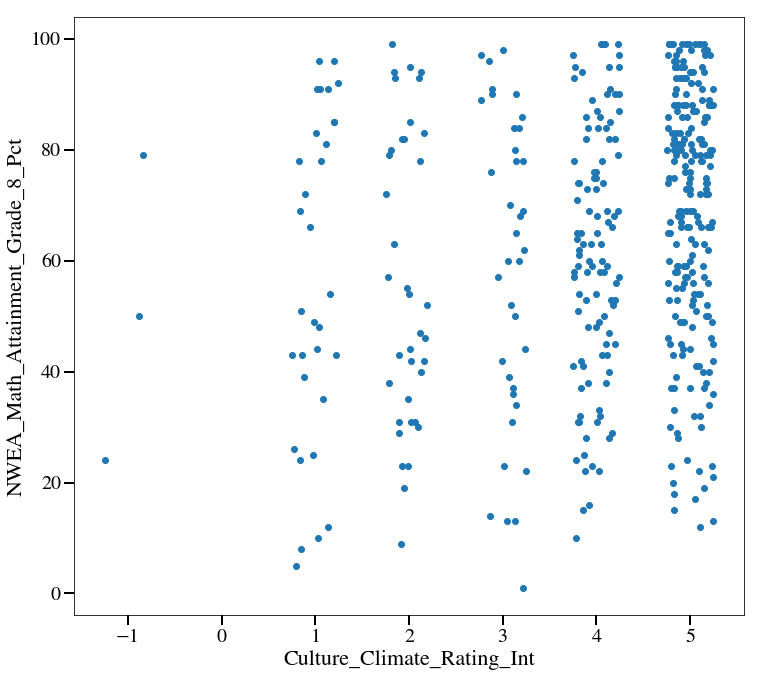

In [29]:
scatter_plot( combined_df, 'Culture_Climate_Rating_Int', 'NWEA_Math_Attainment_Grade_8_Pct', True )

In [13]:
overall_rating_mapping = {
    'INCOMPLETE DATA': -1.,
    'EMERGING': 1.,
    'DEVELOPING': 2.,
    'STRONG': 3.,
    'EXCELLING': 4.,
}
overall_rating_int = []
for rating in combined_df['Creative_School_Certification']:
    overall_rating_int.append( overall_rating_mapping[rating] )
combined_df['Creative_School_Certification_Int'] = np.array( overall_rating_int )

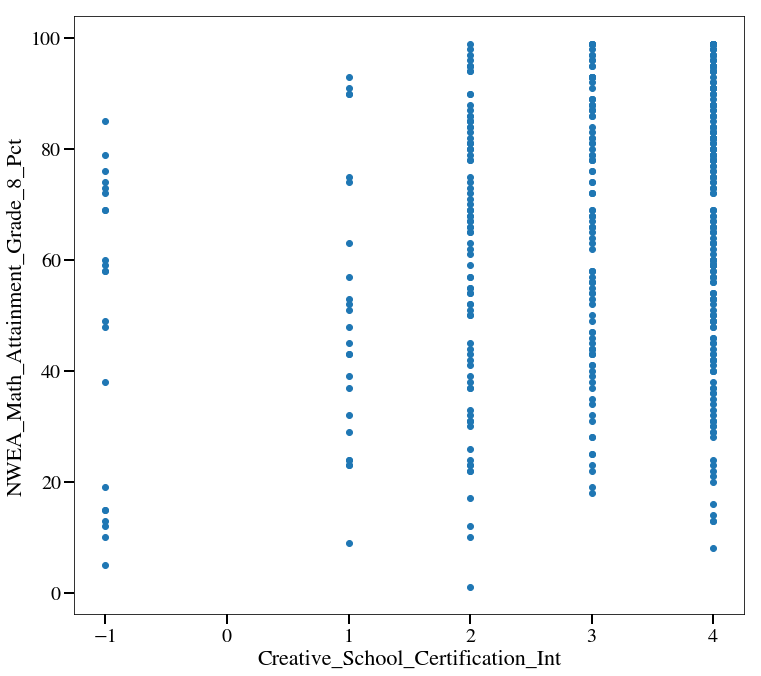

In [14]:
scatter_plot( combined_df, 'Creative_School_Certification_Int', 'NWEA_Math_Attainment_Grade_8_Pct' )